# Mise en oeuvre de l'algorithme EM

Cindy Trinh
Pauline HU
02/12/18

## Calcul de la valeur de la densité de probabilité d'un mélange de gaussienne en un point
### Les paramétres de la fonction gm_pdf
<ul>
<li>x : le point où l'on calcule la valeur de la densitè</li>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilitès de la loi multinomiale associèe</li>
</ul>

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

**norm.pdf()** : Renvoie la valeur en x par la loi normale de moyenne mu et d'écart-type sigma.

In [3]:
def gm_pdf(x, mu, sigma, p):
    
    """Renvoie un nombre aléatoire suivant une loi X, 
    tel que X est la somme de différentes gaussiennes, chacunes pondérées par les poids p_i."""
    
    #Initialisation de la variable de sortie
    resultat = 0.0
    
    # Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
   
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur les écarts-types')
    
    else:
    # Calcul de la valeur de la densité
        for i in range(0, len(p)):
            resultat = resultat + p[i] * norm.pdf(x, mu[i], sigma[i])
    
    return resultat

## Génération de nombre aléatoire suivant un mélange de gaussienne
Dans un mélange de gaussienne chaque densité de probabilité correspondant à une loi normale est pondérée par un coefficient plus petit que un.
La somme de tous ces coefficients est égale à un. Une variable aléatoire qui suit une loi normale suit donc une des lois normales du mélange avec une probabilité égale au coefficient de pondération de cette même loi normale. Pour générer un échantillon suivant une loi normale, il faut donc procéder en deux étapes :
<ol>
<li>Tirer aléatoirement un nombre entre 1 et N (le nombre de gaussiennes du mélange) suivant une loi mumltinomiale définie par les coefficients du mélange.</li>
<li>Une fois ce nombre obtenu, on génère le nombre suivant la loi normale associée.</li>
</ol>
### Les paramètres de la fonction gm_rnd
<ul>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilités de la loi multinomiale associée</li>
</ul>

**gm_rnd()** : renvoie un nombre aléatoire distribué selon une loi normale de moyenne m et d'écart-type sigma. Le choix de la loi normale se fait uniformément parmi plusieurs.

**uniform.rvs()** : renvoie size nombres aléatoires entre loc et loc + scale selon une distribution uniforme.

In [4]:
def gm_rnd(mu, sigma, p):
    """Renvoie un nombre aléatoire qui a une probabilité p_i de suivre la loi X_i, 
    loi normale de moyenne mu_i, et d'écart-type sigma_i. """
    
    
    # Initialisation de la variable de sortie
    resultat = 0.0
    
    
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur sur les écarts-types')
    else:
    
    
    #Génération de l'échantillon
    # On échantillonne suivant une loi uniforme sur [0,1]
        u = uniform.rvs(loc = 0.0, scale = 1.0, size = 1) 
   
    # % Chaque test suivant permet de définir un intervalle sur lequel la
    # probabilité d'appartenance de la variable uniforme est égale à l'une des
    # probabilités définie dans le vecteur p. Lorsque u appartient à l'un de
    # ces intervalles, c'est équivalent à avoir générer une variable aléatoire
    # suivant l'un des éléments de p. Par exemple, pour le premier test
    # ci-dessous, la probabilité que u appartienne à l'intervalle [0,p[0][ est
    # égale à p[0] puisque u suit une loi uniforme. Donc si u appartient à
    # [0,p[0][ cela est équivalent à avoir tirer suivant l'événement de probabilité p[0].
       
        if u < p[0]: # On test si on a généré un événement de probabilité p[0]
            
            resultat = sigma[0] * norm.rvs(loc = 0, scale = 1, size = 1) + mu[0]
            # Pour générer suivant une loi normale quelconque, il suffit de multiplier
            # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
            # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
        
        for i in range(1, len(p)):
            
            if (u > np.sum(p[0:i])) and (u <= np.sum(p[0:i+1])): # On test si on a généré un événement de probabilité p[i]
                
                resultat = sigma[i] * norm.rvs(loc = 0.0, scale = 1.0, size = 1) + mu[i]
                # Pour générer suivant une loi normale quelconque, il suffit de multiplier
                # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
                # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
    
    return resultat

### Les paramètres de la densité de mélange de gaussienne

In [5]:
p = np.array([0.2, 0.5, 0.3])
mu = np.array([-5.0, 0.0, 6.0])
sigma = np.array([1.0, 0.5, 1.0])

### Calcul de la densité de probabilité du mélange de gaussienne

In [6]:
x = np.arange(-20,20, 0.001)
pointPdf = gm_pdf(x, mu, sigma, p)

### Tracé de la densité de probabilité du mélange de gaussienne

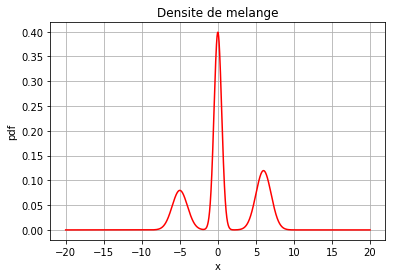

In [7]:
plt.plot(x, pointPdf, 'r-')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()
plt.show()

#### Affichage des gaussiennes avec poids et sans poids:

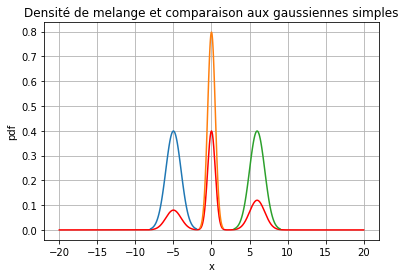

In [8]:
plt.figure()
plt.plot(x, pointPdf, 'r-')
for i in range(len(p)):
    x_ = np.linspace(mu[i] - 3*sigma[i], mu[i] + 3*sigma[i], 100)
    plt.plot(x_,plt.mlab.normpdf(x_, mu[i], sigma[i]))

plt.title('Densité de melange et comparaison aux gaussiennes simples')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()
plt.show()

On voit que la somme des 3 gaussiennes avec un poids attribué à chacunes d'elles a réduit, par la proportion p, chaque gaussienne par rapport à leur taille d'origine. On modélise ainsi que la probabilité qu'un point échantillon de points suivent cette densité de probabilité est plus fable qu'une autre densité de probabilité avec un poids plus élevé.

### Génération d'échantillons suivant  densité de probabilité du mélange de gaussienne

On génère un échantillon de points qui suit une densité de probabilité de mélange de gaussiennes. Le but de l'exercice est d'estimer la loi de génération de cet échantillon (détermier la fonction de densité de l'échantillon). On aimerait obtenir une le mélange des 3 gaussiennes fixées au départ.

In [9]:
nbEchantillon = 1000
donnees = np.array(nbEchantillon*[0],dtype = float)  # initialisation en mémoire d'un array de taille len(nbEchantillon)
for i in range(0, nbEchantillon, 1):
    donnees[i] = gm_rnd(mu, sigma, p)  # on crée array de nombre aléatoire suivant une distribution gaussienne de moyenne et écart-type choisis de manière.

### Tracé des échantillons 

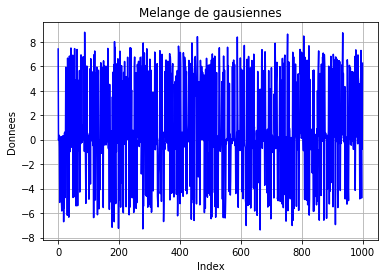

In [10]:
plt.plot(donnees, 'b')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

On obtient des nombres qui parraissent désordonnées.

### Tracé des échantillons

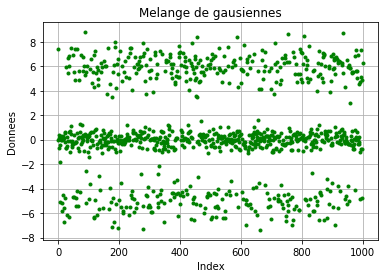

In [11]:
plt.plot(donnees, 'g.')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

In [12]:
# moyenne des 3 gaussiennes
mu = np.array([-5.0, 0.0, 6.0])

Avec cette visualisation, on retrouve bien que les données ont étés tirées selon 3 gaussiennes. On a bien les données qui se resserent autour de trois valeurs (moyennes des trois gaussiennes fixées au départ: -5, 0 et 6).

### Tracé de l'histogramme des échantillons

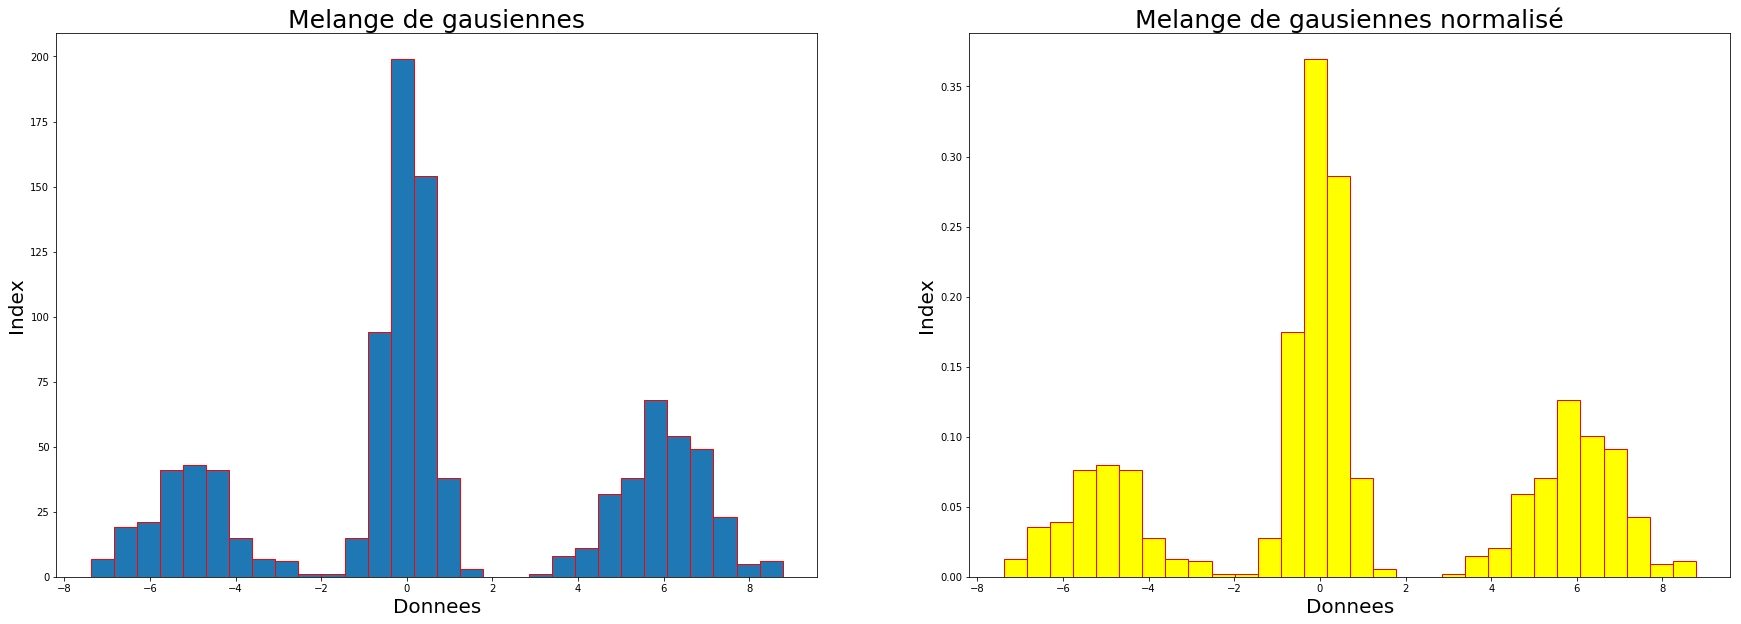

In [13]:
plt.figure(figsize = (30,10))
plt.subplot(1,2,1)
plt.hist(donnees, bins = 30, normed = False, edgecolor = "red")
plt.title('Melange de gausiennes', fontsize = 25)
plt.xlabel('Donnees',fontsize = 20)
plt.ylabel('Index', fontsize = 20)

plt.subplot(1,2,2)
plt.hist(donnees, bins = 30, normed = True, color = 'yellow', edgecolor = "red")
plt.title('Melange de gausiennes normalisé', fontsize = 25)
plt.xlabel('Donnees', fontsize = 20)
plt.ylabel('Index',fontsize = 20)

plt.show()

Les données suivent bien une 3 distributions gaussiennes.

L'histogramme permet de visualiser les gaussiennes qui ont le plus grand poids.

In [14]:
# poids de chaque gaussienne
p

array([0.2, 0.5, 0.3])

In [15]:
# centre de chaque gaussienne
mu

array([-5.,  0.,  6.])

L'histogramme centré en 0 est prépondérant, il contient le plus de valeur. Il correspond bien à la gaussienne de plus frand poids.!!

### L'algorithme EM

In [16]:
print('Valeurs à estimer :')
print('mu: ', mu)
print('sigma : ', sigma)
print('poids : ', p)

Valeurs à estimer :
mu:  [-5.  0.  6.]
sigma :  [1.  0.5 1. ]
poids :  [0.2 0.5 0.3]


In [17]:
nbMaxIterations = 40

# initialisation des paramètres à estimer (initialisation aléatoire~)
mu_em = np.array([-0.0156, -4.9148, 5.9692])
sigma_em = np.array([1.3395, 1.3395, 1.3395])
alpha_em = np.array([0.4800, 0.2200, 0.3000]) # poids : probabilité de suivre la densité normale i

nbIteration = 1 #Initialisation de la variable d'arrêt
nbComposante = len(alpha_em) #Nombre de composantes du mélange
nbDonnees = len(donnees)  #Nombre de données
p = np.zeros(shape = (nbComposante, nbDonnees)) #Déclaration et initialisation de la matrice qui va contenir les probabilités
# on a donc p[i,j] est la probabilité que la donnée xj soit distribuée selon la gaussienne i
# p(k|x,theta_courant)
                       
alpha_em_new = alpha_em
sigma_em_carre_new = sigma_em
mu_em_new = mu_em
donneesP = np.zeros(shape=(nbEchantillon))

while nbIteration < nbMaxIterations:
    
    # Parcours des données expérimentales
    for n in range(0, nbDonnees, 1): # range([start, stop[, step)
        
        # Calcul du nouveau p(k|x,theta_courant) (à optimiser)
        for k in range(0, nbComposante, 1):
            p[k, n] = alpha_em[k] * norm.pdf(x = donnees[n], loc = mu_em[k], scale = sigma_em[k])
        p[:, n] = p[:, n] / np.sum(p[:, n])
    
    # parcours des variables à estimer
    for k in range(0, nbComposante, 1):
        
        # Calcul du nouvel alpha_em
        alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees
        
        # Calcul de la nouvelle moyenne
        for n in range(0, nbDonnees, 1):
            donneesP[n] = donnees[n] * p[k, n]
        mu_em_new[k]  = np.sum(donneesP) / np.sum(p[k, :])
        
        # Calcul de la variance
        for n in range(nbDonnees):
            donneesP[n] = ((donnees[n] - mu_em_new[k]) ** 2) * p[k, n]
        sigma_em_carre_new[k] = np.sum(donneesP) / np.sum(p[k, :])
    
    mu_em = mu_em_new
    sigma_em = np.sqrt(sigma_em_carre_new)
    alpha_em = alpha_em_new
    nbIteration = nbIteration + 1

In [18]:
print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em)
print('Ecart type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

Les paramètres estimés sont : 
Moyennes des composantes du mélange [ 0.01602848 -5.04962767  5.99136644]
Ecart type des composantes du mélange [0.50595008 0.98991541 1.02083256]
Probabilités des composantes du mélange [0.50353564 0.20145627 0.2950081 ]


**Paramètres de départ :**

p = np.array([0.2, 0.5, 0.3])

mu = np.array([-5.0, 0.0, 6.0])


sigma = np.array([1.0, 0.5, 1.0])

Les résultats estimés sont proches des paramètres réels de la génération des gaussiennes.

In [19]:
print('La somme des probabilités des composantes du mélange vaut : ', np.sum(alpha_em))

La somme des probabilités des composantes du mélange vaut :  1.0


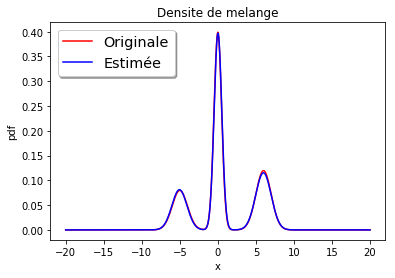

In [20]:
plt.plot(x, pointPdf, 'r-', label = 'Originale')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

Les gaussiennes réelles et estimées sont quasiment superposées!

## Test sur données 'Galaxy Data'

Nous voulons estimer la répartition des galaxies dans l'univers avec un set de données sur la vitesse de 82 de galaxies. Nous prévoyons d'observer différents regroupements de galaxies entres elles.

In [21]:
galaxy = pd.read_excel('Galaxy.xlsx', header = None)
galaxy = galaxy.values.T[0] # convert dataframe to numpy ndarray

In [22]:
galaxy

array([ 9172,  9350,  9483,  9558,  9775, 10227, 10406, 16084, 16170,
       18419, 18552, 18600, 18927, 19052, 19070, 19330, 19343, 19349,
       19440, 19473, 19529, 19541, 19547, 19663, 19846, 19856, 19863,
       19914, 19918, 19973, 19989, 20166, 20175, 20179, 20196, 20215,
       20221, 20415, 20629, 20795, 20821, 20846, 20875, 20986, 21137,
       21492, 21701, 21814, 21921, 21960, 22185, 22209, 22242, 22249,
       22314, 22374, 22495, 22746, 22747, 22888, 22914, 23206, 23241,
       23263, 23484, 23538, 23542, 23666, 23706, 23711, 24129, 24285,
       24289, 24366, 24717, 24990, 25633, 26960, 26995, 32065, 32789,
       34279], dtype=int64)

### Visualisation du dataset :

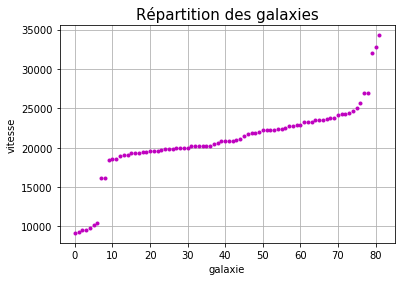

In [23]:
plt.plot(galaxy, 'm.')
plt.xlabel('galaxie')
plt.ylabel('vitesse')
plt.title('Répartition des galaxies', fontsize = 15)
plt.grid()
plt.show()

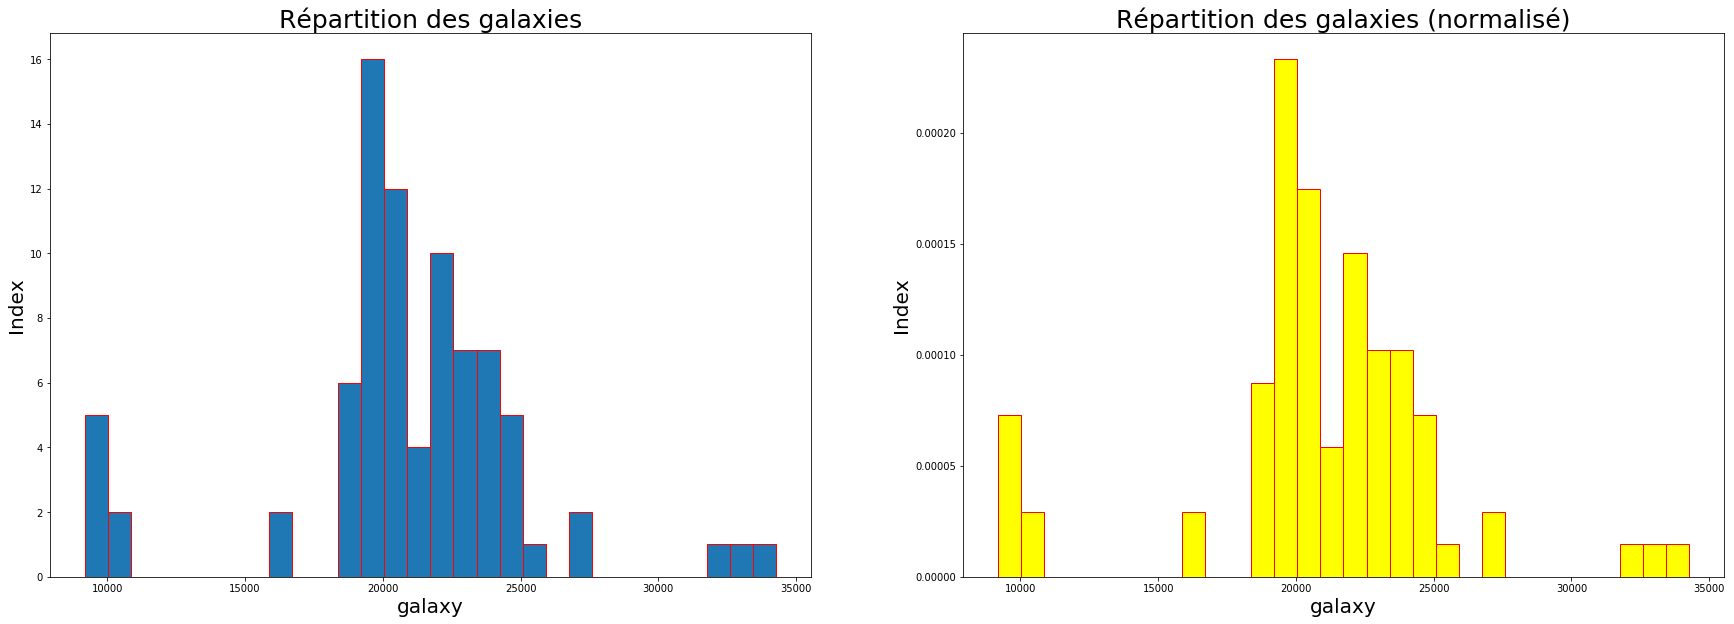

In [24]:
plt.figure(figsize = (30,10))
plt.subplot(1,2,1)
plt.hist(galaxy, bins = 30, normed = False, edgecolor = "red")
plt.title('Répartition des galaxies', fontsize = 25)
plt.xlabel('galaxy',fontsize = 20)
plt.ylabel('Index', fontsize = 20)

plt.subplot(1,2,2)
plt.hist(galaxy, bins = 30, normed = True, color = 'yellow', edgecolor = "red")
plt.title('Répartition des galaxies (normalisé)', fontsize = 25)
plt.xlabel('galaxy', fontsize = 20)
plt.ylabel('Index',fontsize = 20)

plt.show()

On remamrque 3 groupement de vitesses, autour de v1 = 10 000, v2 = 20 250, v3 = 30 250. Choisissons ces points pour l'initialisation.

#### Statistiques sur le dataset galaxy :

In [25]:
len(galaxy)

82

In [26]:
mean = np.mean(galaxy)
mean

20831.463414634145

In [27]:
np.std(galaxy)

4540.194806702445

In [28]:
max = np.max(galaxy)
max

34279

In [29]:
min = np.min(galaxy)
min

9172

### Testons avec 3 cluster de galaxies :

In [30]:
nbMaxIterations = 40

# initialisation des paramètres à estimer (initialisation aléatoire~)
mu_em = np.array([10000, 20250, 30250])
sigma_em = np.array([mean, mean, mean])
alpha_em = np.array([0.1, 0.8, 0.1]) # poids : probabilité de suivre la densité normale i

nbIteration = 1 #Initialisation de la variable d'arrêt
nbComposante = len(alpha_em) #Nombre de composantes du mélange
nbgalaxy = len(galaxy)  #Nombre de données
p = np.zeros(shape = (nbComposante, nbgalaxy)) #Déclaration et initialisation de la matrice qui va contenir les probabilités
# on a donc p[i,j] est la probabilité que la donnée xj soit distribuée selon la gaussienne i
# p(k|x,theta_courant)
                       
alpha_em_new = alpha_em
sigma_em_carre_new = sigma_em
mu_em_new = mu_em
galaxyP = np.zeros(shape=(nbEchantillon))

while nbIteration < nbMaxIterations:
    
    # Parcours des données expérimentales
    for n in range(0, nbgalaxy, 1): # range([start, stop[, step)
        
        # Calcul du nouveau p(k|x,theta_courant) (à optimiser)
        for k in range(0, nbComposante, 1):
            p[k, n] = alpha_em[k] * norm.pdf(x = galaxy[n], loc = mu_em[k], scale = sigma_em[k])
        p[:, n] = p[:, n] / np.sum(p[:, n])
    
    # parcours des variables à estimer
    for k in range(0, nbComposante, 1):
        
        # Calcul du nouvel alpha_em
        alpha_em_new[k] = np.sum(p[k,:]) / nbgalaxy
        
        # Calcul de la nouvelle moyenne
        for n in range(0, nbgalaxy, 1):
            galaxyP[n] = galaxy[n] * p[k, n]
        mu_em_new[k]  = np.sum(galaxyP) / np.sum(p[k, :])
        
        # Calcul de la variance
        for n in range(nbgalaxy):
            galaxyP[n] = ((galaxy[n] - mu_em_new[k]) ** 2) * p[k, n]
        sigma_em_carre_new[k] = np.sum(galaxyP) / np.sum(p[k, :])
    
    mu_em = mu_em_new
    sigma_em = np.sqrt(sigma_em_carre_new)
    alpha_em = alpha_em_new
    nbIteration = nbIteration + 1

In [31]:
print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em)
print('Ecart type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

Les paramètres estimés sont : 
Moyennes des composantes du mélange [19343 22793 19778]
Ecart type des composantes du mélange [8165.94310988 1226.84755267  618.80045699]
Probabilités des composantes du mélange [0.26149282 0.38700621 0.35150096]


2 des gaussiennes sont centrées au même endroit. Et globalement les gaussiennes sont centrées sur les données entre les valeurs 20 000 et 25000. Le choix de paramètre 3 gaussiennes n'est pas bon. Regardons les résultats graphiques.

### Visualisation de la densité estimée par l'algorithme EM :

In [32]:
x = np.arange(min, max, 1000)

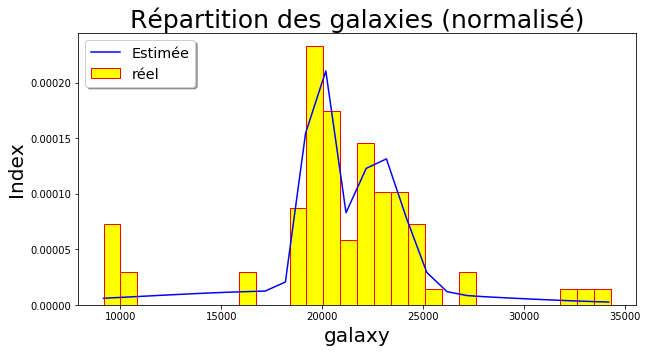

In [33]:
plt.figure(figsize = (10,5))
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')

plt.hist(galaxy, bins = 30, normed = True, color = 'yellow', edgecolor = "red", label = 'réel')

plt.legend(loc='upper left', shadow = True, fontsize = 'x-large')
plt.title('Répartition des galaxies (normalisé)', fontsize = 25)
plt.xlabel('galaxy', fontsize = 20)
plt.ylabel('Index',fontsize = 20)
plt.show()


Les 2 gaussiennes de centre proches ne sont pas distingables. On observe clairement 2. Les galaxies aux extrémités ne forment pas de clusters.

Essayons avec 5 clusters.

### Testons avec 5 cluster de galaxies :

In [34]:
xIterations = 40

# initialisation des paramètres à estimer (initialisation aléatoire~)
mu_em = np.array([10000, 19500, 22800, 23000, 30250])
sigma_em = np.array([mean, mean, mean, mean, mean])
alpha_em = np.array([0.1, 0.3, 0.3, 0.2, 0.1]) # poids : probabilité de suivre la densité normale i

nbIteration = 1 #Initialisation de la variable d'arrêt
nbComposante = len(alpha_em) #Nombre de composantes du mélange
nbgalaxy = len(galaxy)  #Nombre de données
p = np.zeros(shape = (nbComposante, nbgalaxy)) #Déclaration et initialisation de la matrice qui va contenir les probabilités
# on a donc p[i,j] est la probabilité que la donnée xj soit distribuée selon la gaussienne i
# p(k|x,theta_courant)
                       
alpha_em_new = alpha_em
sigma_em_carre_new = sigma_em
mu_em_new = mu_em
galaxyP = np.zeros(shape=(nbEchantillon))

while nbIteration < nbMaxIterations:
    
    # Parcours des données expérimentales
    for n in range(0, nbgalaxy, 1): # range([start, stop[, step)
        
        # Calcul du nouveau p(k|x,theta_courant) (à optimiser)
        for k in range(0, nbComposante, 1):
            p[k, n] = alpha_em[k] * norm.pdf(x = galaxy[n], loc = mu_em[k], scale = sigma_em[k])
        p[:, n] = p[:, n] / np.sum(p[:, n])
    
    # parcours des variables à estimer
    for k in range(0, nbComposante, 1):
        
        # Calcul du nouvel alpha_em
        alpha_em_new[k] = np.sum(p[k,:]) / nbgalaxy
        
        # Calcul de la nouvelle moyenne
        for n in range(0, nbgalaxy, 1):
            galaxyP[n] = galaxy[n] * p[k, n]
        mu_em_new[k]  = np.sum(galaxyP) / np.sum(p[k, :])
        
        # Calcul de la variance
        for n in range(nbgalaxy):
            galaxyP[n] = ((galaxy[n] - mu_em_new[k]) ** 2) * p[k, n]
        sigma_em_carre_new[k] = np.sum(galaxyP) / np.sum(p[k, :])
    
    mu_em = mu_em_new
    sigma_em = np.sqrt(sigma_em_carre_new)
    alpha_em = alpha_em_new
    nbIteration = nbIteration + 1

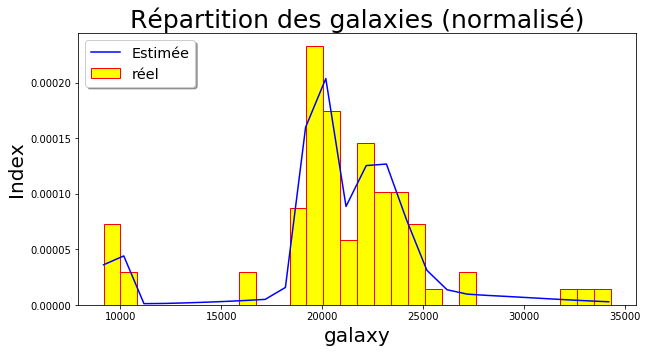

In [35]:
plt.figure(figsize = (10,5))
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')

plt.hist(galaxy, bins = 30, normed = True, color = 'yellow', edgecolor = "red", label = 'réel')

plt.legend(loc='upper left', shadow = True, fontsize = 'x-large')
plt.title('Répartition des galaxies (normalisé)', fontsize = 25)
plt.xlabel('galaxy', fontsize = 20)
plt.ylabel('Index',fontsize = 20)
plt.show()


Le graphe permet de définir 3 regroupements de galaxies.

Le choix des paramètres d'initialisation biaise grandement les résultats de l'estimation.

## Clustering avec scikit-learn : 

Nous choisissons l'algorithme de clustering K_means.

In [36]:
from sklearn.cluster import KMeans

In [37]:
# redimensionner les données pour kmeans
galaxy_kmeans = galaxy.reshape(-1,1)

In [38]:
# Entraînement avec kmeans
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(galaxy_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [39]:
# label des clusters prédits par kmeans
label = kmeans.labels_

In [40]:
# Indexation des données pour la visualisation graphique
index = np.arange(0,82, 1, dtype = int)
galaxy_index = np.hstack((index.reshape(-1,1),galaxy.reshape(-1,1)))

In [42]:
# Sélection des données par classe
galaxy_0 = galaxy_index[label == 0]
galaxy_1 = galaxy_index[label == 1]
galaxy_2 = galaxy_index[label == 2]
galaxy_3 = galaxy_index[label == 3]

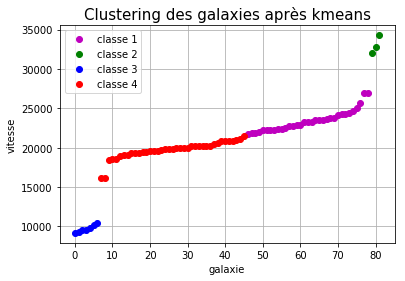

In [43]:
# Visualisation graphique
plt.figure()
plt.plot(galaxy_0[:,0], galaxy_0[:,1], 'mo', label = 'classe 1')
plt.plot(galaxy_1[:,0], galaxy_1[:,1], 'go', label = 'classe 2')
plt.plot(galaxy_2[:,0], galaxy_2[:,1], 'bo', label = 'classe 3')
plt.plot(galaxy_3[:,0], galaxy_3[:,1], 'ro', label = 'classe 4')
plt.xlabel('galaxie')
plt.ylabel('vitesse')
plt.title('Clustering des galaxies après kmeans', fontsize = 15)
plt.legend()
plt.grid()

plt.show()

Le clustering a prédit 4 classes qui paraissent cohérentes à l'oeil.